<a href="https://colab.research.google.com/github/MasrukHabib/Practice-of-Machine-Learning/blob/main/Data_preprocessing_with_Cluster_Based_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa as lib
from scipy.fftpack import fft, fftfreq

In [2]:
import pandas as pd
df = pd.read_csv("/content/Epileptic Seizure Recognition.csv")
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [3]:
df.drop('Unnamed', axis=1, inplace=True)

In [4]:
df.isnull().sum()

X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [6]:
data_nor = df[df['y'] != 1].drop('y', axis=1)
data_nor.reset_index(drop=True, inplace=True)

data_epi = df[df['y'] == 1].drop('y', axis=1)
data_epi.reset_index(drop=True, inplace=True)

In [7]:
df["OUTPUT_LABEL"] = df.y == 1
df["OUTPUT_LABEL"] = df["OUTPUT_LABEL"].astype(int)
df.drop('y', axis=1, inplace=True)

In [8]:
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,OUTPUT_LABEL
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [16]:
df['OUTPUT_LABEL'].nunique()

2

In [10]:
# Define feature matrix X and target vector y
X = df.drop('OUTPUT_LABEL', axis=1)
y = df['OUTPUT_LABEL']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
import pandas as pd
class_distribution = df['OUTPUT_LABEL'].value_counts()
print("Class Distribution:")
print(class_distribution)
balanced = class_distribution.min() / class_distribution.max() >= 0.5
if balanced:
    print("The data is balanced.")
else:
    print("The data is imbalanced.")

Class Distribution:
OUTPUT_LABEL
0    9200
1    2300
Name: count, dtype: int64
The data is imbalanced.


Original class distribution: Counter({0: 9200, 1: 2300})


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Resampled class distribution: Counter({0: 9200, 1: 9200})


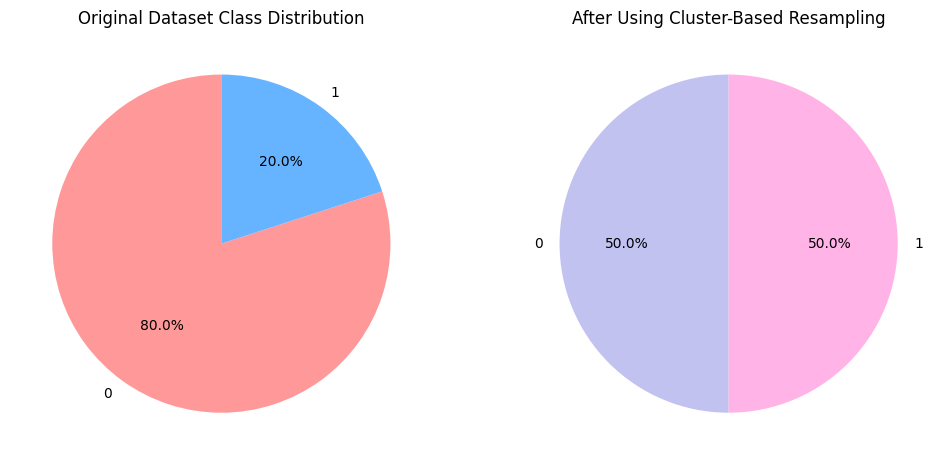

In [21]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Original class distribution
original_counts = Counter(y)
print("Original class distribution:", original_counts)

# Separate the minority and majority classes
X_minority = X[y == min(original_counts, key=original_counts.get)]
X_majority = X[y == max(original_counts, key=original_counts.get)]

# Apply KMeans to find cluster centroids for the minority class
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_minority)
centroids = kmeans.cluster_centers_

# Generate synthetic data points around the centroids
n_samples_to_generate = len(X_majority) - len(X_minority)
synthetic_samples = []
for _ in range(n_samples_to_generate):
    centroid = centroids[np.random.randint(0, n_clusters)]
    synthetic_sample = centroid + np.random.normal(scale=0.1, size=X.shape[1])
    synthetic_samples.append(synthetic_sample)

synthetic_samples = np.array(synthetic_samples)

# Combine the original majority class with the original and synthetic minority class
X_resampled = np.vstack([X_majority, X_minority, synthetic_samples])
y_resampled = np.hstack([
    np.full(len(X_majority), max(original_counts, key=original_counts.get)),
    np.full(len(X_minority) + len(synthetic_samples), min(original_counts, key=original_counts.get))
])

# Resampled class distribution
resampled_counts = Counter(y_resampled)
print("Resampled class distribution:", resampled_counts)

# Custom colors
colors_original = ['#ff9999', '#66b3ff']
colors_resampled = ['#c2c2f0', '#ffb3e6']

# Plot Pie Chart for Original Dataset
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(original_counts.values(), labels=original_counts.keys(), autopct='%1.1f%%', startangle=90, colors=colors_original)
plt.title('Original Dataset Class Distribution')

# Plot Pie Chart for Resampled Dataset
plt.subplot(1, 2, 2)
plt.pie(resampled_counts.values(), labels=resampled_counts.keys(), autopct='%1.1f%%', startangle=90, colors=colors_resampled)
plt.title('After Using Cluster-Based Resampling')

# Display the pie charts
plt.show()
